#Investigating Loan Default Data

Checklist:

- Basic data cleaning and feature exploration

- Exploratory data analysis (Answering questions we have of the data)

- Basic Data Engineering (Creating a pipeline for tain and test sets)

- Model Experimentation and parameter tuning (Linear Regression, Random Forest, XGBoost, MLP)

- Feature Engineering

- Ensembling



##Data Dictionary

* ID: unique ID of representative
* Loan Amount: loan amount applied
* Funded Amount:loan amount funded
* Funded Amount Investor: loan amount approved by the investors
* Term: term of loan (in months)
* Batch Enrolled: batch numbers to representatives
* Interest Rate: interest rate (%) on loan
* Grade: grade by the bank
* Sub Grade: sub-grade by the bank
* Debit to Income: ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage
* Delinquency - two years: number of 30+ days delinquency in past 2 - years
* Inquires - six months: total number of inquiries in last 6 months
* Open Account: number of open credit line in representative's - credit line
* Public Record: number of derogatory public records
* Revolving Balance: total credit revolving balance
* Revolving Utilities: amount of credit a representative is using - relative to revolving_balance
* Total Accounts: total number of credit lines available in - representatives credit line
* Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)
* Total Received Interest: total interest received till date
* Total Received Late Fee: total late fee received till date
* Recoveries: post charge off gross recovery
* Collection Recovery Fee: post charge off collection fee
* Collection 12 months Medical: total collections in last 12 months - excluding medical collections
* Application Type: indicates when the representative is an individual or joint
* Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled
* Accounts Delinquent: number of accounts on which the representative is delinquent
* Total Collection Amount: total collection amount ever owed
* Total Current Balance: total current balance from all accounts
* Total Revolving Credit Limit: total revolving credit limit
* Loan Status: 1 = Defaulter, 0 = Non Defaulters



#Features of how importance based on my own logic:

ID: This feature is a unique identifier and typically does not provide any predictive power or insights about loan defaults. It can be safely ignored for the analysis.

Loan Amount: The loan amount applied by borrowers may be relevant as larger loans could potentially be riskier. It is worth investigating this feature further to determine its predictive power.

Funded Amount and Funded Amount Investor: These features represent the actual loan amounts funded and approved by investors, respectively. They can provide insights into the bank's decision-making process but may not directly contribute to predicting loan defaults. However, the difference between the applied and funded amounts could be an interesting metric to consider.

Term: The term of the loan in months might be informative, as longer-term loans may carry higher default risks. Analyzing the relationship between loan term and default rates could be valuable.

Batch Enrolled: This feature represents batch numbers assigned to representatives. It might not directly relate to loan defaults but could offer insights into loan origination processes or potential clustering effects. Further exploration is recommended.

Interest Rate: The interest rate assigned to the loan could be an important predictor of loan defaults. Higher interest rates might indicate riskier borrowers. Analyzing the relationship between interest rates and default rates is crucial.

Grade and Sub Grade: These categorical features assigned by the bank might be useful in predicting loan defaults. Grades and sub-grades often reflect the borrower's creditworthiness, and they are typically based on factors like credit history, income, and employment stability.

Debt to Income: This ratio provides information about the borrower's financial health. A higher debt-to-income ratio might indicate a higher default risk. Analyzing the relationship between debt-to-income ratio and loan defaults is recommended.

Delinquency - two years: The number of 30+ days delinquencies in the past two years can be a strong indicator of default risk. Borrowers with a history of delinquencies are more likely to default in the future.

Inquiries - six months: The number of credit inquiries made in the last six months might indicate the borrower's recent credit-seeking behavior. A higher number of inquiries could imply increased financial stress and potentially higher default risk.

Open Account: The number of open credit lines reflects the borrower's credit utilization and creditworthiness. A higher number of open accounts might indicate a lower default risk.

Public Record: The presence of derogatory public records, such as bankruptcies or tax liens, can be a significant predictor of loan defaults. Borrowers with public records are generally considered higher risk.

Revolving Balance and Revolving Utilities: These features provide information about the borrower's credit utilization ratio. Higher credit utilization might suggest a higher default risk. Investigate the relationship between credit utilization and default rates.

Total Accounts: The total number of credit lines available to the borrower could indicate their creditworthiness and financial stability. A higher number of accounts might suggest a lower default risk.

Initial List Status: This feature represents the unique listing status of the loan. While it might not directly indicate loan defaults, it could offer insights into the loan origination process or potential data biases. Further investigation is recommended.

Total Received Interest, Total Received Late Fee, Recoveries, Collection Recovery Fee, Collection 12 months Medical: These features represent financial transactions related to loan repayments, recoveries, and collections. While they may not be directly predictive of loan defaults, they can provide insights into the effectiveness of debt recovery strategies.

Application Type: This feature indicates whether the representative is an individual or joint applicant. It might offer






In [1]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, PowerTransformer
from sklearn.utils import shuffle



# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Feature Selection 

# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter
#### for ANOVA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# balance the data
from imblearn.over_sampling import SMOTE


# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier

#hyperparameter tuning
import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# balance the data
from imblearn.over_sampling import SMOTE

from scipy.stats import ttest_ind

import datetime
from tqdm import tqdm
from itertools import combinations

RANDOM_STATE = int(datetime.date.today().year)

#recall

from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA6999:Capstone/Loan Default/train.csv')

df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


##EDA

In [3]:
#I see no use in any of the features being of object data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

##Feature Engineering

In [4]:
df.select_dtypes(include=['int64', 'float64']).nunique()


ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Interest Rate                   67448
Home Ownership                  67454
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 12 months Medical        2
Last week Pay                     162
Accounts Delinquent                 1
Total Collection Amount          2193
Total Current Balance           60901
Total Revolving Credit Limit    37708
Loan Status                         2
dtype: int64

###These numerical features are better used as cateogrical later since the numeric assignments are non-continuous, rather they represent a level of intensity on a scale.

In [5]:
df['Accounts Delinquent'].unique()

array([0])

In [6]:
df['Term'].unique()

array([59, 36, 58])

In [7]:
df['Delinquency - two years'].unique()

array([1, 0, 3, 6, 2, 7, 5, 4, 8])

In [8]:
df['Inquires - six months'].unique()

array([0, 3, 2, 1, 4, 5])

In [9]:
df['Public Record'].unique()

array([0, 1, 2, 4, 3])

In [10]:
df['Collection 12 months Medical'].unique()

array([0, 1])

In [11]:
df[['Term','Inquires - six months','Public Record','Collection 12 months Medical']]=df[['Term','Inquires - six months','Public Record','Collection 12 months Medical']].astype('object')

In [12]:
#Number of Unique values of each objecy and categorical feature

df.select_dtypes(include=['object', 'category']).nunique()

Term                              3
Batch Enrolled                   41
Grade                             7
Sub Grade                        35
Employment Duration               3
Verification Status               3
Payment Plan                      1
Loan Title                      109
Inquires - six months             6
Public Record                     5
Initial List Status               2
Collection 12 months Medical      2
Application Type                  2
dtype: int64

In [13]:
#Batch Enrolled: This feature represents batch numbers assigned to representatives. 
#It might not directly relate to loan defaults but could offer insights into loan 
#origination processes or potential clustering effects.

df['Batch Enrolled']

0        BAT2522922
1        BAT1586599
2        BAT2136391
3        BAT2428731
4        BAT5341619
            ...    
67458    BAT3193689
67459    BAT1780517
67460    BAT1761981
67461    BAT2333412
67462    BAT1930365
Name: Batch Enrolled, Length: 67463, dtype: object

In [14]:
#Loan grading is the process of assigning a quality score to a loan application to identify a risk of default.

df['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [15]:
#Sub grades seem to be correlated with grades but not perfectly. We can see more
#loans under the G subgrades than in the actual G grade for example

df['Sub Grade'].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

In [16]:
#some of these loan titles are the same but recorded with different spelling/verbiage
#May be useful to make a top 20

df['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [17]:
#Since it looks like the top3 make up 90% we will replace the rest with Other 

df['Loan Title'].value_counts().iloc[:20]

Credit card refinancing      30728
Debt consolidation           24841
Debt Consolidation            3544
Other                         2455
Home improvement              2211
Major purchase                 487
Medical expenses               237
Business                       183
Moving and relocation          157
Car financing                  135
Vacation                       114
debt consolidation             105
Consolidation                   97
Home buying                     94
Personal Loan                   78
Debt Consolidation Loan         71
Credit Card Consolidation       68
Home Improvement                68
Consolidate                     55
Consolidation Loan              55
Name: Loan Title, dtype: int64

In [18]:
#Since it looks like the top3 make up over 90% of the values and some others are just repeats
#We can reduce these values to just 3 unique ones. 

#Refinance, Consolidation and Other

print('Ratio consisted of the top 4 values:' ,  round((df['Loan Title'].value_counts().iloc[:4].sum()/df['Loan Title'].shape[0]) ,2))

Ratio consisted of the top 4 values: 0.91


In [19]:
df['Loan Title'] = df['Loan Title'].replace(['Debt consolidation'], 'Debt Consolidation')

In [20]:
top3 = df['Loan Title'].value_counts()[:3].index

in_top3 = df['Loan Title'].isin(top3)

in_top3

df['Loan Title'] = np.where(~in_top3 == True, 'Other',df['Loan Title'] )

In [21]:
df['Loan Title'].value_counts('normalize')

Credit card refinancing    0.455479
Debt Consolidation         0.420749
Other                      0.123772
Name: Loan Title, dtype: float64

In [22]:
#converting object into cateogry

def convert_obj_to_cat(df):
    obj_cols = df.select_dtypes(include=['object']).columns
    df[obj_cols] = df[obj_cols].astype('category')
    return df

df = convert_obj_to_cat(df)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            67463 non-null  int64   
 1   Loan Amount                   67463 non-null  int64   
 2   Funded Amount                 67463 non-null  int64   
 3   Funded Amount Investor        67463 non-null  float64 
 4   Term                          67463 non-null  category
 5   Batch Enrolled                67463 non-null  category
 6   Interest Rate                 67463 non-null  float64 
 7   Grade                         67463 non-null  category
 8   Sub Grade                     67463 non-null  category
 9   Employment Duration           67463 non-null  category
 10  Home Ownership                67463 non-null  float64 
 11  Verification Status           67463 non-null  category
 12  Payment Plan                  67463 non-null  

## Data Profile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=87029a5478497808347c0f67911bdb531dca8d945aebeb6116c33d2b63271b9c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

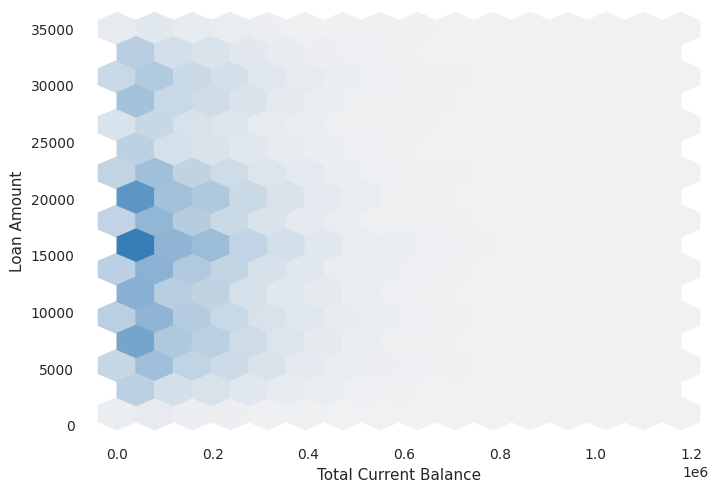

In [23]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile_eda = ProfileReport(df)

profile_eda

###Dropping columns that wil not be useful



In [24]:
#Accounts delinquent only has 1 value of 0 and thus may not be useful for our model
#There is also only 1 unique values for payment plan 

df = df.drop(['ID', 'Accounts Delinquent','Payment Plan'], axis =1)

##Is the Data Distribution Normal?

###Skewness

We can see some columns need to have their skewness removed

<ipython-input-25-6ce6f21d3aab>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().plot(kind='bar')


<Axes: >

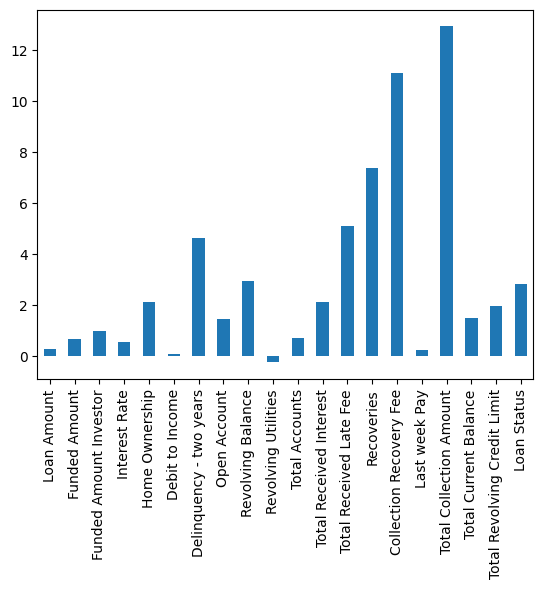

In [25]:
df.skew().plot(kind='bar')

In [26]:
df.skew() > .5 




<ipython-input-26-0f09135844a0>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew() > .5


Loan Amount                     False
Funded Amount                    True
Funded Amount Investor           True
Interest Rate                    True
Home Ownership                   True
Debit to Income                 False
Delinquency - two years          True
Open Account                     True
Revolving Balance                True
Revolving Utilities             False
Total Accounts                   True
Total Received Interest          True
Total Received Late Fee          True
Recoveries                       True
Collection Recovery Fee          True
Last week Pay                   False
Total Collection Amount          True
Total Current Balance            True
Total Revolving Credit Limit     True
Loan Status                      True
dtype: bool

###Scaling

It is obvious form the data dispalyed below that features are on totally different scales. We will have to use scaling to prepare our data for the model.

In [27]:
numeric_data = pd.DataFrame(df._get_numeric_data())

numeric_data.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Loan Amount,67463.0,16848.902776,8367.865726,1014.000000,10012.000000,16073.000000,22106.000000,3.500000e+04
Funded Amount,67463.0,15770.599114,8150.992662,1014.000000,9266.500000,13042.000000,21793.000000,3.499900e+04
Funded Amount Investor,67463.0,14621.799323,6785.345170,1114.590204,9831.684984,12793.682170,17807.594120,3.499975e+04
Interest Rate,67463.0,11.846258,3.718629,5.320006,9.297147,11.377696,14.193533,2.718235e+01
Home Ownership,67463.0,80541.502522,45029.120366,14573.537170,51689.843335,69335.832680,94623.322785,4.065615e+05
Debit to Income,67463.0,23.299241,8.451824,0.675299,16.756416,22.656658,30.048400,3.962986e+01
Delinquency - two years,67463.0,0.327127,0.800888,0.000000,0.000000,0.000000,0.000000,8.000000e+00
Open Account,67463.0,14.266561,6.225060,2.000000,10.000000,13.000000,16.000000,3.700000e+01
Revolving Balance,67463.0,7699.342425,7836.148190,0.000000,2557.000000,5516.000000,10184.500000,1.169330e+05
Revolving Utilities,67463.0,52.889443,22.539450,0.005172,38.658825,54.082334,69.177117,1.008800e+02


###Outliers

<ipython-input-28-95c75d6cf2c6>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7, 4, n+1) #Adjust rows, columns of subplots


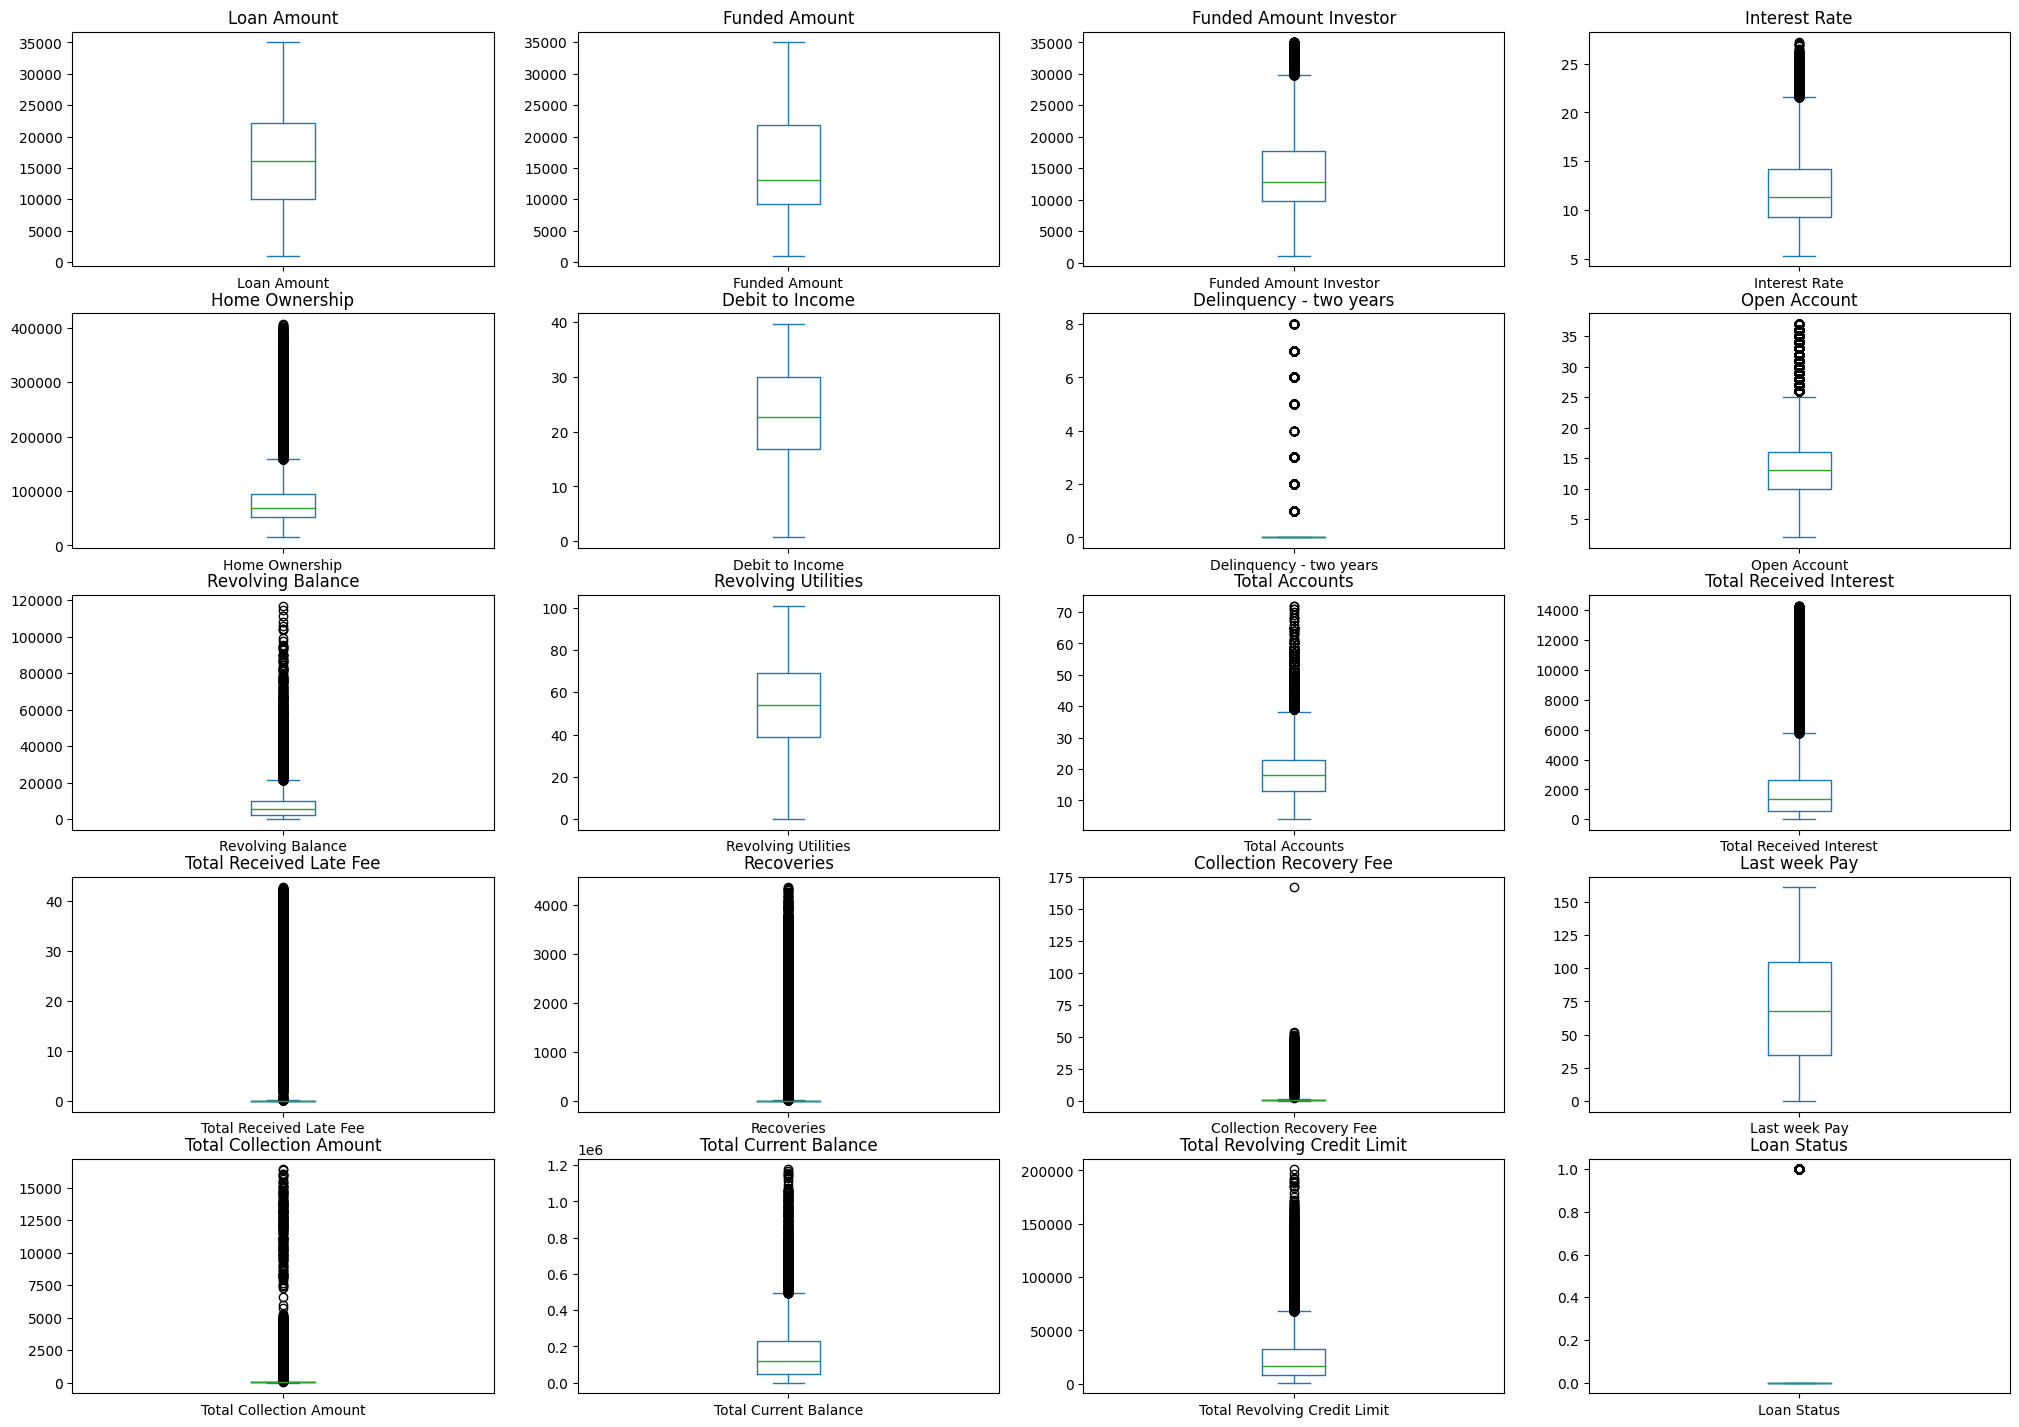

In [28]:
#The numeric data

#From the boxplots we see the presence of outliers. This can skew the data. 
#I am aiming for a normal distribution for my models.

numeric_data = pd.DataFrame(df._get_numeric_data())

fig, ax = plt.subplots(figsize = (25, 25)) #change size
for n, col in enumerate(numeric_data.columns):
    plt.subplot(7, 4, n+1) #Adjust rows, columns of subplots
    numeric_data[col].plot(ax = plt.gca(), kind='box')
    plt.title(col)
    
plt.show()

##Summary of EDA

- `ID` holds no values for our models as they are all unique and serve only as an ID of each index so I have dropped it.

- No missing values and I was able to drop columns with only 1 unique value.They were: `Payment Plan` and `Accounts Delinquent`

- Reduced Unique Categories of `Loan Title `to top 3 which held 90% of values previously.



- No Duplicates

- There are some imblanced columns which we may be able to use for some additional predictions such as:

1. `Predicting Public Record` - Do they or should they?

2. `Predicting Collections` - Collection 12 months Medical: total collections in last 12 months - excluding medical collections

3. Predicting `Loan Status` - Default or not

- None of the features appear to be highly correlated to each other

- We have skewed data that we can reduce to make more normalized

- Data is on different scale so as a standard we must scale it.

- There are outliers in the numeric data which will need to be handled.


In [29]:
#Too many classes with 41. No way of interpreting or binning
df = df.drop('Batch Enrolled',axis=1)

##Preprocessing Pipelines

I will use 3 different pipelines for preprocessing the data before moving onto Feature Selection

In [110]:
X = df.drop('Loan Status', axis=1)
y = df['Loan Status'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.33, random_state=2023, shuffle=True)






In [31]:
## outlier handling function - IQR
def my_iqr(col):
  """outlier handling via the IQR method"""
  ### use np functions to better fit in pipeline
  iqr = 1.5 * (np.quantile(col,.75) - np.quantile(col,.25))
  u_bound = np.quantile(col,.75) + iqr
  l_bound = np.quantile(col,.25) - iqr
  col[col > u_bound], col[col < l_bound] = u_bound, l_bound
  return col

iqr_handler = FunctionTransformer(my_iqr)

In [32]:
## Handling outliers with x_bar +/- 3*StD
def my_std(col):
    mean = col.mean()
    std = col.std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    col = np.where(col > upper_bound, upper_bound, col)
    col = np.where(col < lower_bound, lower_bound, col)
    return col

std_handler = FunctionTransformer(my_std)

In [33]:
# Define transformers for numerical and categorical columns

#Process 1
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('iqr', iqr_handler),
#     ('scaler', StandardScaler()),
#     ('normalizer', Normalizer())
# ])

#-----

# #Process 2| better than process 1 ans 2
# numerical_transformer = Pipeline([
#     ('cat_imputer', SimpleImputer(strategy='most_frequent')),## imputer - no need here but as placeholder
#     ("skewness", PowerTransformer()), ## skewness removal 
#     ('outlier', std_handler), ## outlier handling 
#     ("scaler", StandardScaler()) ## z-score scaler 
# ])

#----

#Process 3
# cont_preproc = Pipeline([
#     ('cat_imputer', SimpleImputer(strategy='most_frequent')),## imputer - no need here but as placeholder
#     ('outlier', iqr_handler), ## outlier handling 
#     ("scaler", MinMaxScaler()), ## minmax scaler 
#     ("skewness", PowerTransformer()) ## skewness removal 
# ])

#-----

#Process 2 but with RobustScaler()
# numerical_transformer = Pipeline(steps=[
#     ("skewness", PowerTransformer()), ## skewness removal 
#     # ('outlier', std_handler), ## outlier handling 
#     ("scaler", RobustScaler())
# ])

# Process4
numerical_transformer = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),## imputer - no need here but as placeholder
    ("skewness", PowerTransformer()), ## skewness removal 
    ('outlier', std_handler), ## outlier handling 
    ("scaler", StandardScaler()) ## z-score scaler 
])



#---------

#Categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [34]:
#Categorical and numeric columns

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

#Sliced to exclude our target variable Loan Status
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns[:-1]

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [35]:
# Apply the pipeline to your dataset
X = df.drop('Loan Status', axis=1)
y = df['Loan Status'] 



#Preprocessed Feature Data
Xp = pipeline.fit_transform(X)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
#column names will have to be re-added so we can dinetify our features for feature selection
Xp


array([[-0.76525925,  1.65587879, -0.16968932, ...,  0.        ,
         1.        ,  0.        ],
       [-1.84020072, -0.29798961, -0.19408226, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28844748, -0.74577519,  1.08424034, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.00691227,  1.70028232, -0.16967255, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07159136, -1.806831  ,  1.05760062, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07160833,  1.49635317,  0.14118932, ...,  0.        ,
         1.        ,  0.        ]])

In [37]:
transformed_cols = np.concatenate((X[numerical_columns].columns.values, OneHotEncoder().fit(X[categorical_columns]).get_feature_names_out(categorical_columns)))
transformed_cols

array(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Open Account', 'Revolving Balance',
       'Revolving Utilities', 'Total Accounts', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Last week Pay', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Term_36',
       'Term_58', 'Term_59', 'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D',
       'Grade_E', 'Grade_F', 'Grade_G', 'Sub Grade_A1', 'Sub Grade_A2',
       'Sub Grade_A3', 'Sub Grade_A4', 'Sub Grade_A5', 'Sub Grade_B1',
       'Sub Grade_B2', 'Sub Grade_B3', 'Sub Grade_B4', 'Sub Grade_B5',
       'Sub Grade_C1', 'Sub Grade_C2', 'Sub Grade_C3', 'Sub Grade_C4',
       'Sub Grade_C5', 'Sub Grade_D1', 'Sub Grade_D2', 'Sub Grade_D3',
       'Sub Grade_D4', 'Sub Grade_D5', 'Sub Grade_E1', 'Sub Grade_E2',
       'Sub Grade_E3', 'Sub

In [38]:
Xp_df = pd.DataFrame(Xp, columns=transformed_cols)

Xp_df

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Revolving Balance,Revolving Utilities,...,Public Record_1,Public Record_2,Public Record_3,Public Record_4,Initial List Status_f,Initial List Status_w,Collection 12 months Medical_0,Collection 12 months Medical_1,Application Type_INDIVIDUAL,Application Type_JOINT
0,-0.765259,1.655879,-0.169689,-0.082146,1.783116,-0.809044,1.818119,0.021621,1.757209,0.981326,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-1.840201,-0.297990,-0.194082,0.217592,-1.227532,-0.920228,-0.544000,-0.192084,-1.443207,1.133680,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.288447,-0.745775,1.084240,0.297883,0.553892,0.596216,-0.544000,0.215120,-0.905813,-2.204863,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.603201,-1.251610,0.653691,1.266635,0.883294,-0.588780,1.818119,-1.755206,1.016785,0.644297,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.108993,-0.109194,0.035215,0.892288,-0.988170,-0.692570,1.818119,0.021621,-1.031701,1.449349,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,-0.286341,-1.277656,-0.024694,-0.597637,0.381645,0.592576,1.818119,0.021621,-0.257036,2.020621,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
67459,-1.011149,-0.439813,0.353791,-0.422486,-0.130796,-0.632143,-0.544000,-0.192084,0.607105,-1.638808,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
67460,-0.006912,1.700282,-0.169673,1.840255,-1.541888,-1.604280,-0.544000,-1.755206,-0.775733,-2.227589,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
67461,0.071591,-1.806831,1.057601,0.455883,0.667838,-1.991474,-0.544000,0.215120,-1.216626,0.689994,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


###Splitting Data

In [118]:
X_train, X_test, y_train, y_test = train_test_split(Xp_df, y, test_size=.20,  random_state=2023, stratify=y)

##Feature Selection

In [119]:
feature_df = pd.concat([X_train, y_train], axis=1)

feature_df

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Revolving Balance,Revolving Utilities,...,Public Record_2,Public Record_3,Public Record_4,Initial List Status_f,Initial List Status_w,Collection 12 months Medical_0,Collection 12 months Medical_1,Application Type_INDIVIDUAL,Application Type_JOINT,Loan Status
36439,-0.167913,1.195566,0.085160,-0.759131,-0.197271,0.689548,1.897015,0.021621,1.197093,1.388804,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2635,-0.049985,1.258352,-0.591992,-0.631212,-0.153277,0.632970,-0.544000,1.403865,-0.927770,-0.249804,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
24355,-0.137814,-1.239442,0.437162,-1.648383,-1.262813,1.238628,-0.544000,0.553184,2.426684,-0.955831,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
21501,1.439390,0.239779,1.023357,0.108163,0.074670,-1.392906,-0.544000,-0.192084,0.259387,0.666039,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
51979,0.441357,-1.113485,1.896221,-1.557232,0.644534,-1.467964,1.897015,0.215120,-0.228852,-0.862366,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31910,0.130059,-1.583876,-0.041460,-0.115116,0.934773,-0.152628,-0.544000,-1.348482,0.590246,-0.317944,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
16881,1.110691,1.449753,0.808099,-0.067290,0.467217,0.765295,-0.544000,-0.696997,0.374435,-0.147438,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
22235,-0.079038,-0.835681,-1.174819,0.594129,0.845766,-0.170190,-0.544000,0.021621,-0.096501,-0.049064,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
20646,0.642655,-1.057791,-0.649113,-0.115371,0.254046,0.902325,-0.544000,1.585548,0.900263,0.525996,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [120]:
# define the feature list to select from
feature_lst = list(feature_df.iloc[:,:-1].columns)
len(feature_lst)

90

In [121]:
feature_lst

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Interest Rate',
 'Home Ownership',
 'Debit to Income',
 'Delinquency - two years',
 'Open Account',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Last week Pay',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Term_36',
 'Term_58',
 'Term_59',
 'Grade_A',
 'Grade_B',
 'Grade_C',
 'Grade_D',
 'Grade_E',
 'Grade_F',
 'Grade_G',
 'Sub Grade_A1',
 'Sub Grade_A2',
 'Sub Grade_A3',
 'Sub Grade_A4',
 'Sub Grade_A5',
 'Sub Grade_B1',
 'Sub Grade_B2',
 'Sub Grade_B3',
 'Sub Grade_B4',
 'Sub Grade_B5',
 'Sub Grade_C1',
 'Sub Grade_C2',
 'Sub Grade_C3',
 'Sub Grade_C4',
 'Sub Grade_C5',
 'Sub Grade_D1',
 'Sub Grade_D2',
 'Sub Grade_D3',
 'Sub Grade_D4',
 'Sub Grade_D5',
 'Sub Grade_E1',
 'Sub Grade_E2',
 'Sub Grade_E3',
 'Sub Grade_E4',
 'Sub Grade_E5',
 'Sub Grade_F1',
 'Sub 

In [122]:
def feature_selector(X, y, model, names, _method="topk", n=int(X.shape[1]/2), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT: 
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])

In [123]:
int(round((X_train.shape[1]/2),0))

45

###Feature Selector

In [45]:
# feature_selector(X_train, y_train, model=RandomForestClassifier(), names=feature_lst, n=39)

KeyboardInterrupt: ignored

In [124]:
#Top 39

top39 = ['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Open Account', 'Revolving Balance',
       'Revolving Utilities', 'Total Accounts', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Last week Pay', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Term_59',
       'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E',
       'Sub Grade_B4', 'Sub Grade_B5', 'Employment Duration_MORTGAGE',
       'Employment Duration_OWN', 'Employment Duration_RENT',
       'Verification Status_Not Verified',
       'Verification Status_Source Verified',
       'Verification Status_Verified',
       'Loan Title_Credit card refinancing',
       'Loan Title_Debt Consolidation', 'Loan Title_Other',
       'Inquires - six months_0', 'Initial List Status_f',
       'Initial List Status_w']

###Top n Features

##Balancing the Data with SMOTE

In [125]:
sm = SMOTE(random_state = 2023) 

# X_train = X_train[top39] reducing the number of features did not provide a better model

X_train, y_train = sm.fit_resample(X_train, y_train) 

# I dont want the model to learn from the order of the data
X_train, y_train = shuffle(X_train, y_train)

##Model Candidacy

In [126]:
models = {
  "dt": DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10),
  "lr": LogisticRegression(max_iter=2000),
  "svc": LinearSVC(max_iter=5000),
  "gnb": GaussianNB(),
  "rf": RandomForestClassifier(max_depth=10),
  "sgd": SGDClassifier(loss="hinge"),
  "gb": GradientBoostingClassifier(), ### takes long to train, commented out for demo purpose
  "xgbc" : XGBClassifier()

}


## Number of folds in k-old
k = 10
### f1-macro used since it's a multiclass classification problem
### use f1 if binary
METRICS = ['f1_macro', 'roc_auc', 'recall_weighted', 'recall'] ### also, AUC is not supported for multi-class problems
ROUNDS = 1 ## evaluation rounds


# combine this code with eval code from comp 1

# 4 scores must be generated --> F1 Bias, Variance, AUC Bias and Variance

def model_eval(X_res, y_res, models, metrics=METRICS, k=k, rounds=ROUNDS):
  """evaluating multiple models"""
  res = {}
  
  # sm = SMOTE(random_state = RANDOM_STATE)
  # X_res, y_res = sm.fit_resample(X1, y)
  for model_name, classifier in models.items():
    print("training {} ...".format(classifier))
    scores = []
    for i in tqdm(range(rounds)):
      np.random.seed(RANDOM_STATE)
      random_int = np.random.randint(0,3000)
      kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
      scores.append(model_selection.cross_val_score(classifier, X=X_res, y=y_res, cv=kfold, scoring=metrics))
    # res['Score'] = np.array(scores).flatten()

    # bias[model_name + 'bias'] = 1 - round(np.array(scores).mean(),4)
    # variance[model_name + '_variance'] = round(np.array(scores).std(),4)
    res[model_name] = np.array(scores).flatten()
    # bias[model_name + '_bias'] = 1 - round(np.array(scores).mean(),4)
    # variance[model_name + '_variance'] = round(np.array(scores).std(),4)   
  return res

In [49]:
#Used after scores are pushed into dataframes in order to create df strcitly 
#for bias and variance scores

def get_bivar(df):
  '''
  -Takes a dataframe as a parameter.
  -Creates 3 list for model name, bias score and variance score.
  -Lists are apended into the bivar dictionary to be turned into a DF after the
  function is run.

  '''

  name = []
  bias = []
  variance = []

  bivar = {}

  for col in df.columns:
    name.append(col)
    bias.append(1 - round(np.array(df[col]).mean(),4))
    variance.append(round(np.array(df[col]).std(),4))

  bivar['model'] = name
  bivar['bias'] = bias
  bivar['var'] = variance

  return bivar

In [91]:
# recall_scores = pd.DataFrame(model_eval(X_train, y_train, models, metrics = "recall"))

# out_path = '/content/drive/MyDrive/DATA6999:Capstone/recall_scores'
# recall_scores.to_csv(out_path)

recall_scores = pd.read_csv('/content/drive/MyDrive/DATA6999:Capstone/recall_scores0')

In [97]:
recall_bivar = pd.DataFrame(get_bivar(recall_scores.drop('Unnamed: 0', axis=1)))

In [98]:
recall_scores.drop('Unnamed: 0', axis=1), recall_bivar

(         dt        lr       svc       gnb        rf       sgd        gb  \
 0  0.688244  0.548997  0.563998  0.778412  0.839230  0.636882  0.872493   
 1  0.676743  0.560291  0.548563  0.777833  0.830525  0.606871  0.866369   
 2  0.686596  0.549310  0.558570  0.780666  0.831682  0.483834  0.865313   
 3  0.698343  0.552307  0.550032  0.782976  0.834958  0.628493  0.873457   
 4  0.676704  0.539259  0.564999  0.772220  0.836976  0.553505  0.868221   
 5  0.691334  0.562079  0.538727  0.788357  0.837362  0.566519  0.869758   
 6  0.666013  0.549894  0.526539  0.777723  0.821166  0.547444  0.858403   
 7  0.702462  0.562366  0.561209  0.780439  0.836775  0.573930  0.860565   
 8  0.682276  0.549268  0.479024  0.782439  0.833496  0.537073  0.866016   
 9  0.695765  0.553257  0.504723  0.780782  0.831596  0.485016  0.864658   
 
        xgbc  
 0  0.901190  
 1  0.896597  
 2  0.895857  
 3  0.903346  
 4  0.899790  
 5  0.901003  
 6  0.885024  
 7  0.892946  
 8  0.899350  
 9  0.899186

<ipython-input-99-dbda2be7abf9>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


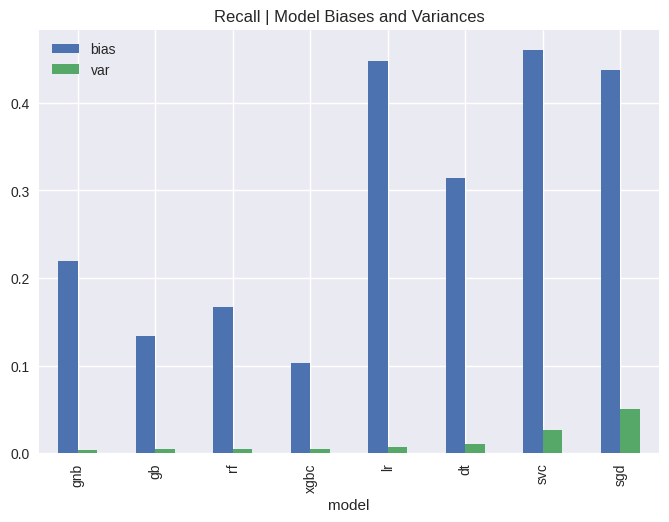

In [99]:
barplot = pd.pivot_table(recall_bivar, index=['model'], values = ['bias','var']).sort_values('var').plot(kind = 'bar')
plt.title('Recall | Model Biases and Variances')



plt.style.use('seaborn')

##Hyperparameter Tuning

In [100]:

import xgboost as xgb

XGB_params  = {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__learning_rate': [0.01, 0.1, 0.3],
        'final_estimator__max_depth': [3, 6, 10],
    }
#Random Search
random_XGB = RandomizedSearchCV(estimator=XGBClassifier(), scoring='recall', param_distributions=XGB_params, cv = 3, n_jobs=-1)

start_time = time.time()
random_xgb_result = random_XGB.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_xgb_result.best_score_, random_xgb_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

[13:22:36] WARNING: ../src/learner.cc:767: 
Parameters: { "final_estimator__learning_rate", "final_estimator__max_depth", "final_estimator__n_estimators" } are not used.

Best: 0.895298 using {'final_estimator__n_estimators': 100, 'final_estimator__max_depth': 3, 'final_estimator__learning_rate': 0.1}
Execution time: 1692.5491535663605 ms


In [101]:
xgb = XGBClassifier(n_estimators= 500, max_depth= 10, learning_rate= 0.3)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

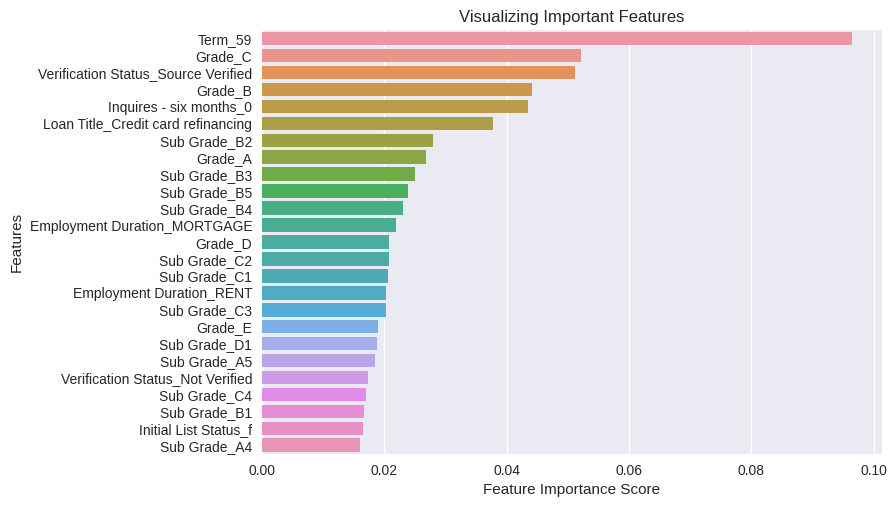

In [162]:
feature_imp = pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values(ascending=False)

top25 = feature_imp.index[:25]

sns.barplot(x=feature_imp[top25], y=top25)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend(iris.feature_names)
plt.show()

In [140]:
y_pred = xgb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

 

print(recall_score( y_test, y_pred, average='micro'))

0.9073593715259765


In [105]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Activation, Dense, Input, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.models import Model
from tensorflow.keras.layers import Dropout

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [106]:
X_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Revolving Balance,Revolving Utilities,...,Public Record_1,Public Record_2,Public Record_3,Public Record_4,Initial List Status_f,Initial List Status_w,Collection 12 months Medical_0,Collection 12 months Medical_1,Application Type_INDIVIDUAL,Application Type_JOINT
45164,0.159610,-1.112802,0.593521,-0.058053,0.020996,-1.553796,1.818119,1.199848,0.214861,0.145457,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
74111,-1.105420,0.939740,-0.688035,-0.896664,-0.450474,1.302325,-0.544000,0.384550,-0.110720,0.876065,...,0.0,0.0,0.0,0.0,0.039354,0.960646,1.0,0.0,1.0,0.0
85689,0.133613,0.362792,-1.033844,0.672701,1.619448,0.203644,1.818119,0.694181,1.509762,-0.854014,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
23591,1.590426,0.456149,-0.572667,-0.566099,0.946524,0.162386,-0.544000,1.304937,-2.817039,1.431779,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0
21093,-0.033683,0.808619,1.068764,-0.277594,-1.325822,0.877375,-0.544000,0.215120,1.205347,-1.075505,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0


In [83]:
#create the input layer
input_layer = Input(shape=(90, ))

h1 = Dense(256, activation='relu')(input_layer)
# norm1 = BatchNormalization()(hidden_1)
d1 = Dropout(0.2)(h1)
h2 = Dense(256, activation='relu')(d1)
# norm2 = BatchNormalization()(hidden_2)
d2 = Dropout(0.2)(h2)
h3 = Dense(256, activation='relu')(d2)
output = Dense(1, activation='sigmoid')(h3)






In [84]:
model = Model(inputs=input_layer, outputs=output)

In [85]:
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience = 2)

model_checkpoint = ModelCheckpoint('best_loan_pred_model.hdf5', save_best_only = True)

In [86]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:

history = model.fit(X_train, y_train ,validation_split=.2, epochs=20, batch_size=512, verbose=2, callbacks =[monitor_val_acc, model_checkpoint])

Epoch 1/20
154/154 - 6s - loss: 0.6305 - accuracy: 0.6413 - val_loss: 0.5646 - val_accuracy: 0.7147 - 6s/epoch - 40ms/step
Epoch 2/20
154/154 - 3s - loss: 0.5502 - accuracy: 0.7220 - val_loss: 0.4932 - val_accuracy: 0.7590 - 3s/epoch - 18ms/step
Epoch 3/20
154/154 - 3s - loss: 0.4647 - accuracy: 0.7826 - val_loss: 0.4158 - val_accuracy: 0.8077 - 3s/epoch - 19ms/step
Epoch 4/20
154/154 - 3s - loss: 0.4043 - accuracy: 0.8186 - val_loss: 0.3433 - val_accuracy: 0.8529 - 3s/epoch - 19ms/step
Epoch 5/20
154/154 - 4s - loss: 0.3588 - accuracy: 0.8420 - val_loss: 0.3203 - val_accuracy: 0.8652 - 4s/epoch - 27ms/step
Epoch 6/20
154/154 - 4s - loss: 0.3278 - accuracy: 0.8599 - val_loss: 0.2894 - val_accuracy: 0.8820 - 4s/epoch - 24ms/step
Epoch 7/20
154/154 - 3s - loss: 0.2984 - accuracy: 0.8744 - val_loss: 0.2716 - val_accuracy: 0.8902 - 3s/epoch - 19ms/step
Epoch 8/20
154/154 - 3s - loss: 0.2807 - accuracy: 0.8823 - val_loss: 0.2684 - val_accuracy: 0.8894 - 3s/epoch - 19ms/step
Epoch 9/20
154/1

The XGboostclassifier performed much better than the Sequential model 

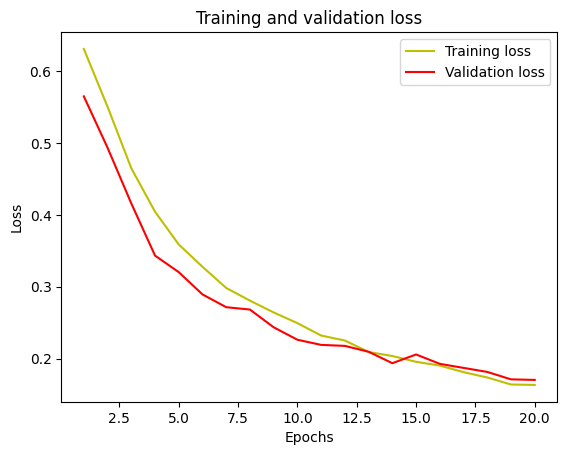

In [88]:
#### plot the training history again
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [163]:
nn_y_pred = model.predict(X_test, batch_size=512, verbose=1)
nn_y_pred_bool = np.argmax(nn_y_pred, axis=1)

27/27 [==============================] - 0s 6ms/step


## Conclusion:

It appears the NN needs some more optimization as it has predicted that all labels ar enot fraud. There is room for future improvements for the XGBoost model however as more feature engineering can be applied to some of the variables which I belive can help XGBoost performance.  